# ЛР №2. Реалiзацiя базової архiтектури згорткової нейронної мережi для вирiшення задачi класифiкацiї чи регресiї

Импорт залежностей

In [4]:
import tensorflow as tf
import keras

from keras import layers
from keras.datasets import mnist
from matplotlib import pyplot as plt

## Виконання роботи

1. Обрати фреймворк для виконання роботи: tensorflow чи pytorch.
2. Обрати простий датасет зображень для вирiшення задачi класифiкацiї чи регресiї. Наприклад, MNIST, Fashion MNIST, Pistachio ImageDataset, Date Fruit Datasets чи iншi.
3. Завантажити, предобробити та роздiлити датасет на тренувальну, валiдацiйну та тестову вибiрки.

In [5]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = tf.expand_dims(train_x, -1)
test_x = tf.expand_dims(test_x, -1)

num_classes = tf.unique(train_y).y.shape[0]
input_shape = train_x.shape[1:]

train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

4. Обрати базову просту архiтектуру згорткової мережi: LeNet5, AlexNet, ZFNet чи побудувати власну.
5. Реалiзувати вибрану архiтектуру на вибраному фреймворцi з нуля з використанням вбудованих класiв шарiв, оптимiзаторiв та iнше.

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1 / 255),
        layers.ZeroPadding2D(padding=2),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(120, activation="relu"),
        layers.Dense(84, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 32, 32, 1)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,966 (257.68 KB)

 Trainable params: 65,966 (257.68 KB)

 Non-trainable params: 0 (0.00 B)

6. Навчити мережу на завантаженому датасетi, використовуючи рiзнi гiперпараметри (можливо, але не обов’язково, використати grid search та cross validation).

In [7]:
train_feedback = model.fit(train_x, train_y, batch_size=128, epochs=100, validation_split=0.1)

score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8099 - loss: 0.6384 - val_accuracy: 0.9767 - val_loss: 0.0868
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9746 - loss: 0.0805 - val_accuracy: 0.9830 - val_loss: 0.0613
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9825 - loss: 0.0547 - val_accuracy: 0.9865 - val_loss: 0.0469
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9875 - loss: 0.0393 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9867 - val_loss: 0.0516
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9893 - val_loss: 0.0394
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9941 - loss: 0.0196 - val_accuracy: 0.9885 - val_loss: 0.0395
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accu

7. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати, зробити висновки.

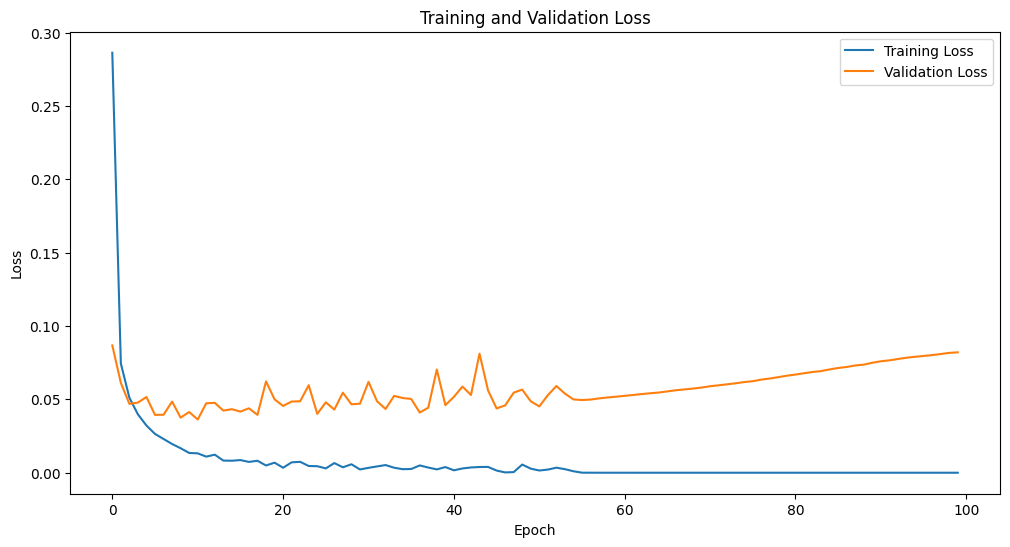

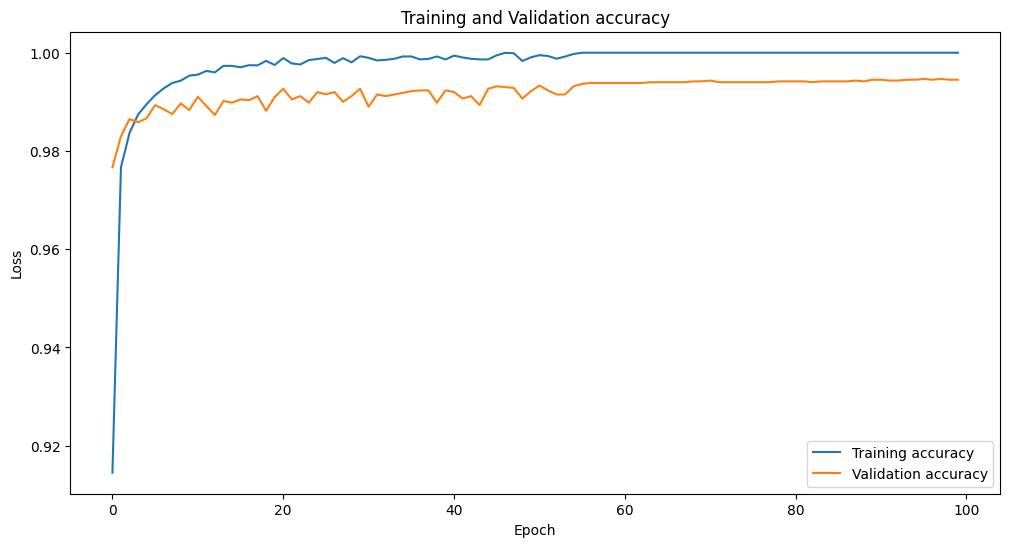

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train_feedback.history["loss"], label="Training Loss")
plt.plot(train_feedback.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_feedback.history["accuracy"], label="Training accuracy")
plt.plot(train_feedback.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()